In [1]:
# Install any missing libraries (if needed)
# !pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [4]:
 ''' # Fill text-based missing values
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Drop rows with missing date_added
df.dropna(subset=['date_added'], inplace=True)

# Fill numeric/categorical with mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)'''


" # Fill text-based missing values\ndf['director'].fillna('Not Available', inplace=True)\ndf['cast'].fillna('Not Available', inplace=True)\ndf['country'].fillna('Unknown', inplace=True)\n\n# Drop rows with missing date_added\ndf.dropna(subset=['date_added'], inplace=True)\n\n# Fill numeric/categorical with mode\ndf['rating'].fillna(df['rating'].mode()[0], inplace=True)\ndf['duration'].fillna(df['duration'].mode()[0], inplace=True)"

In [5]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [7]:
df['date_added'] = df['date_added'].str.strip()  # Removes leading/trailing whitespace
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y")


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


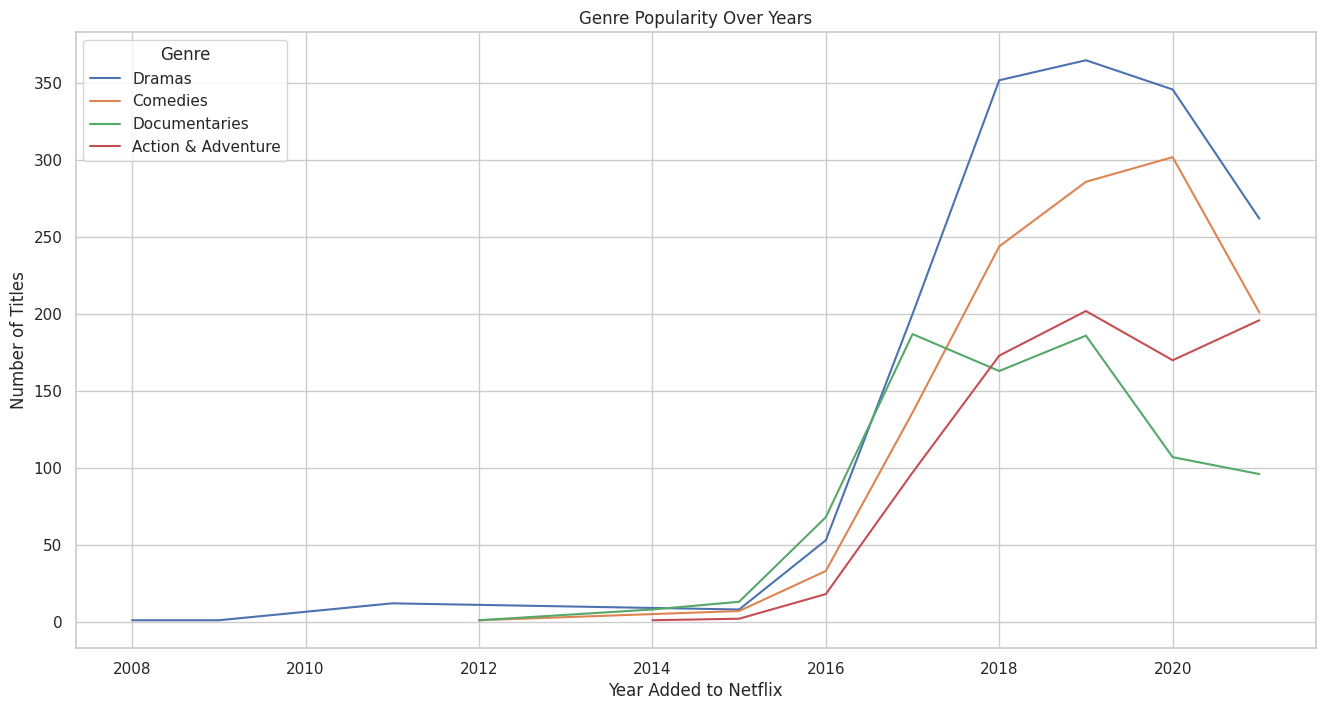

In [9]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Get first genre
df['genres'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Group by year and genre
genre_trend = df.groupby(['year_added', 'genres']).size().reset_index(name='count')

# Filter specific genres for plot
selected_genres = ['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries']
filtered = genre_trend[genre_trend['genres'].isin(selected_genres)]

# Plotting
plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered, x='year_added', y='count', hue='genres')
plt.title("Genre Popularity Over Years")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles")
plt.legend(title='Genre')
plt.show()


In [10]:
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

/tmp/ipython-input-11-2811190130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_trend.values, y=country_trend.index, palette='Blues_d')


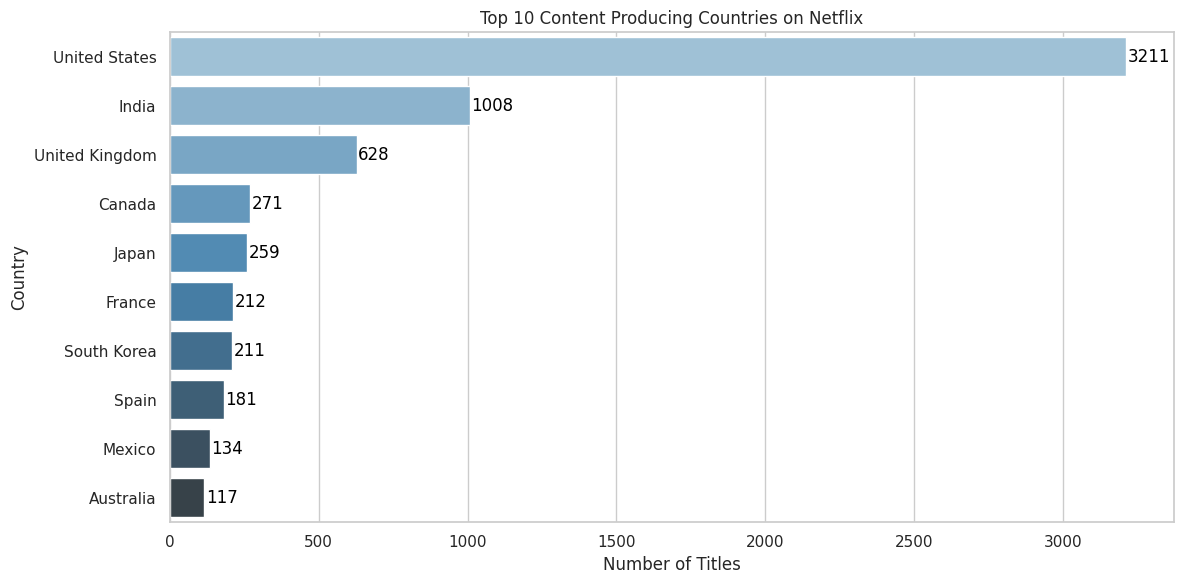

In [11]:
# Optional: remove "Unknown"
country_trend = df['main_country'][df['main_country'] != 'Unknown'].value_counts().head(10)

# Plot
ax = sns.barplot(x=country_trend.values, y=country_trend.index, palette='Blues_d')
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")

# Add value labels
for i, v in enumerate(country_trend.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


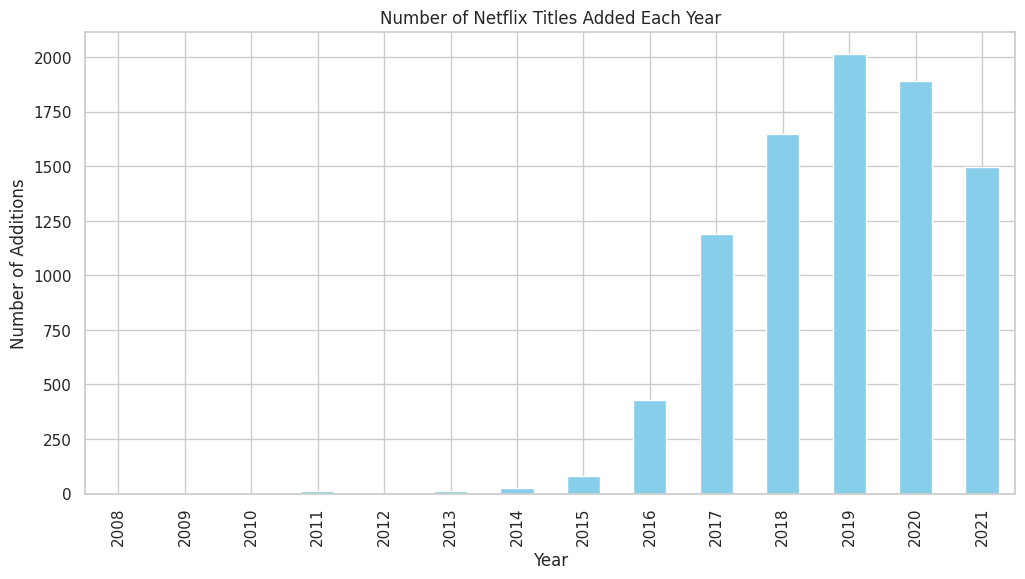

In [12]:
##📅 Trend of Content Addition
additions_per_year = df['year_added'].value_counts().sort_index()

additions_per_year.plot(kind='bar', color='skyblue')
plt.title("Number of Netflix Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Additions")
plt.show()



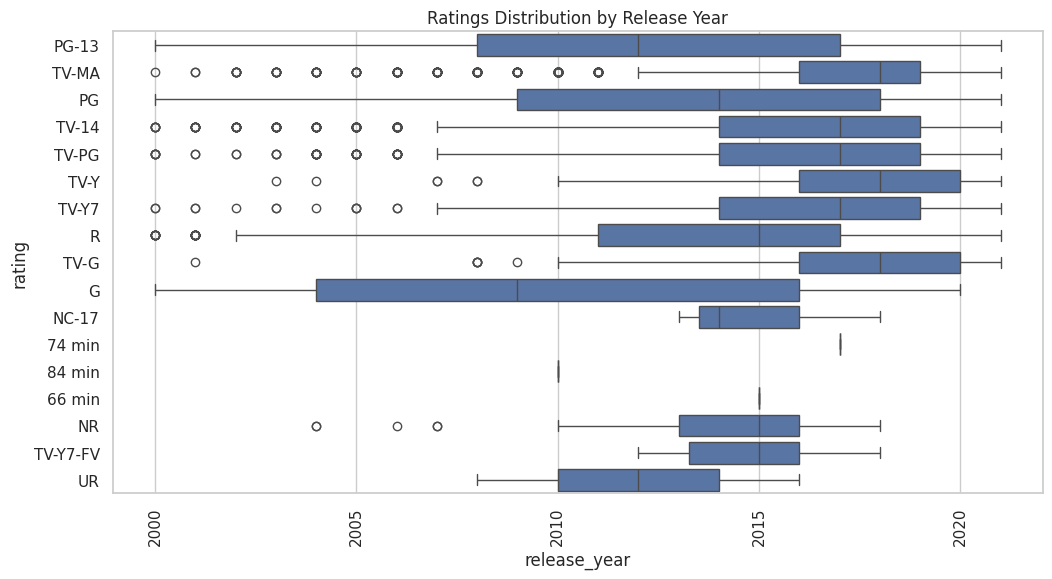

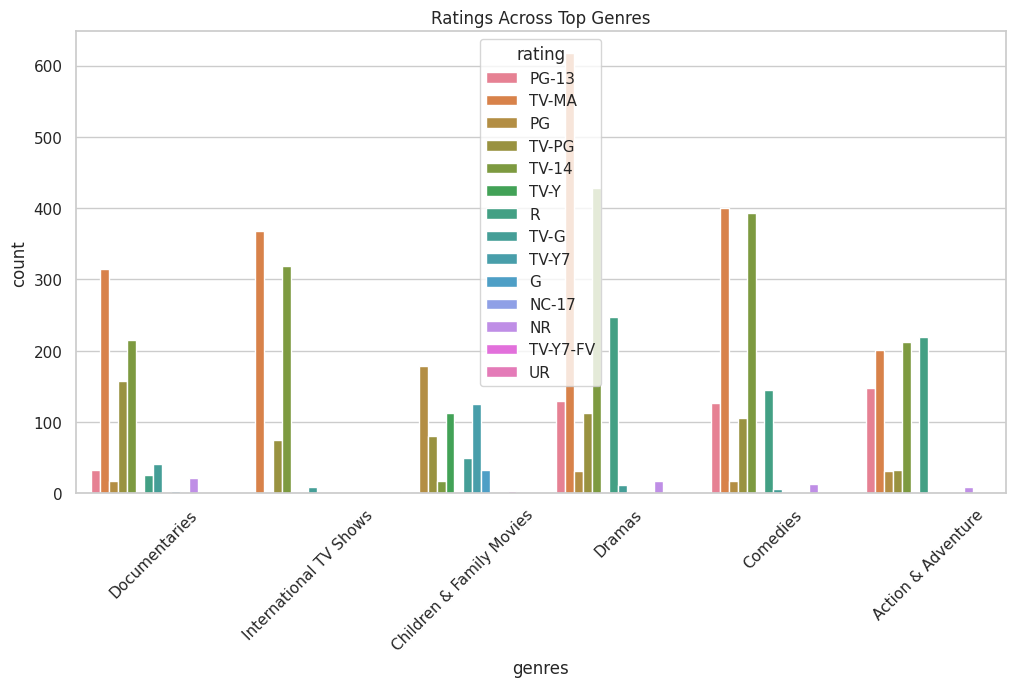

In [13]:
## Ratings vs Release Year / Genre
# Drop null release years
df.dropna(subset=['release_year'], inplace=True)

# Ratings vs Year
sns.boxplot(data=df[df['release_year'] >= 2000], x='release_year', y='rating')
plt.xticks(rotation=90)
plt.title("Ratings Distribution by Release Year")
plt.show()

# Ratings vs Genre
top_genres = df['genres'].value_counts().head(6).index
sns.countplot(data=df[df['genres'].isin(top_genres)], x='genres', hue='rating')
plt.title("Ratings Across Top Genres")
plt.xticks(rotation=45)
plt.show()


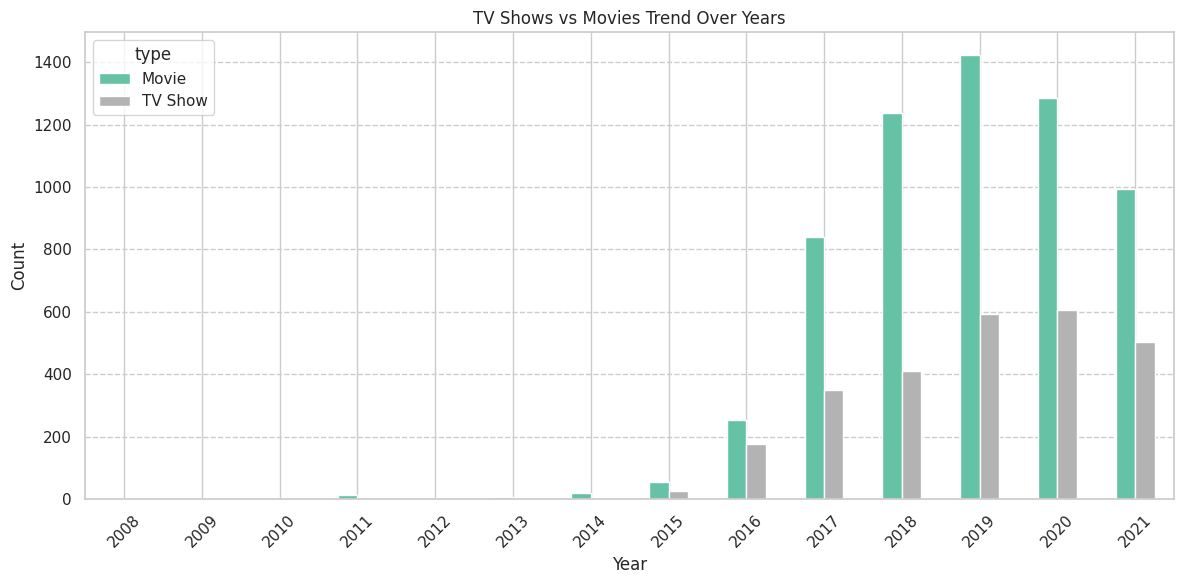

In [14]:
## A. TV Shows vs Movies Over Time


# Extract only necessary columns
content_trend = df[['type', 'year_added']].dropna()

# Count per year
trend = content_trend.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plot
trend.plot(kind='bar', figsize=(12,6), colormap='Set2')
plt.title("TV Shows vs Movies Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


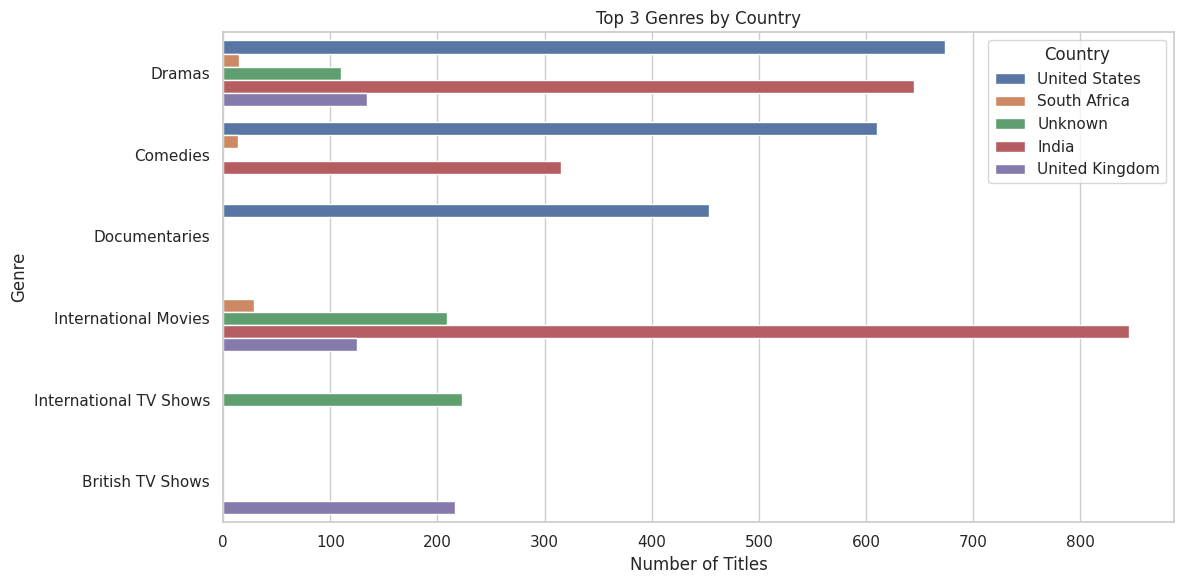

In [15]:
 ## B. Dominant Genres by Country
from collections import Counter

# Focus on countries and genres
top_genres = df[['country', 'listed_in']].dropna()

# Count genres by country
country_genre = {}

for index, row in top_genres.iterrows():
    country = row['country'].split(',')[0].strip()  # Take the first country
    genres = [g.strip() for g in row['listed_in'].split(',')]

    if country not in country_genre:
        country_genre[country] = Counter()

    country_genre[country].update(genres)

# Get a DataFrame of top 3 genres per top 5 countries
selected_countries = list(country_genre.keys())[:5]
records = []

for country in selected_countries:
    top_genre_counts = country_genre[country].most_common(3)
    for genre, count in top_genre_counts:
        records.append({'Country': country, 'Genre': genre, 'Count': count})

genre_df = pd.DataFrame(records)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df, x='Count', y='Genre', hue='Country')
plt.title('Top 3 Genres by Country')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

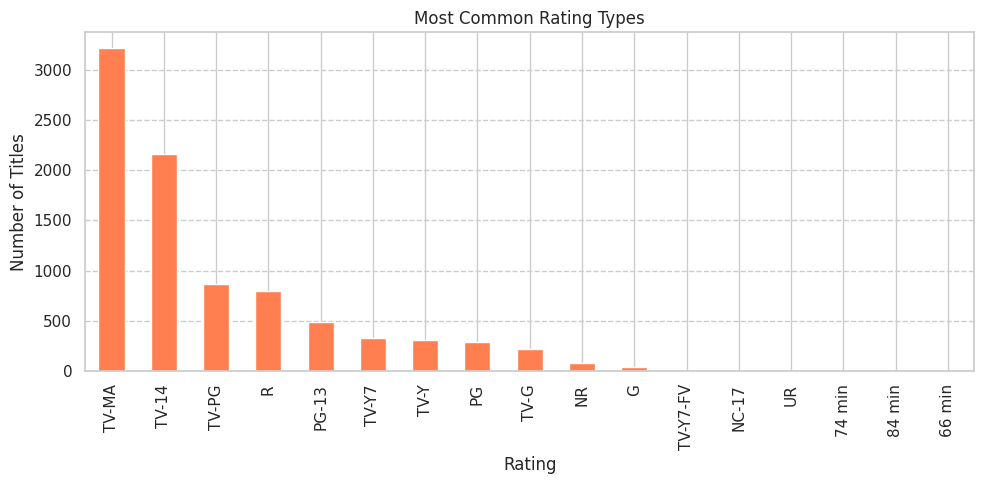

In [16]:
# Most Common Rating Types
# Count rating types
rating_counts = df['rating'].value_counts()

# Plot
rating_counts.plot(kind='bar', color='coral', figsize=(10,5))
plt.title("Most Common Rating Types")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [17]:
# Save the cleaned DataFrame to CSV
df.to_csv("cleaned_netflix_data.csv", index=False)

# Allow download (for Colab)
from google.colab import files
files.download("cleaned_netflix_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>